# HOUSE DAMAGE PREDICTION

## 1) Problem Statement

> The problem we aim to solve in this project is to develop a predictive model that can accurately forecast the level of damage caused to buildings during earthquakes. Mathematical model representation for this problem can be achieved or simulated through the use of various machine learning classification models, especially supervised ML algorithms like RandomForest, DecisionTree, Multinomial Logistic Regression, XGBoost, LightGBM, etc. and even unsupervised ML algorithms that consider various factors like age, land surface condition, foundation type, etc.
 


## 2) Data Collection
* Dataset Source

The dataset we will use for the model training and testing is provided by the "Richter's Predictor: Modelling Earthquake Damage" competition on DrivenData.
https://www.drivendata.org/competitions/57/nepal-earthquake/page/136


* Dataset 

The dataset consist of 38 features and 260601 data points

### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [7]:
df_features = pd.read_csv("data/train_values.csv")
df_labels = pd.read_csv("data/train_labels.csv")

**Show Top 5 Records**

In [8]:
df_features.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


**Merging `features` and `labels` csv files**

In [10]:
df = pd.merge(df_features, df_labels, on='building_id')

In [11]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


**Shape of the dataset**

In [12]:
df.shape

(260601, 40)

### 2.2 Dataset information

* `geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int)`: geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* `count_floors_pre_eq (type: int)`: number of floors in the building before the earthquake.
* `age (type: int)`: age of the building in years.
* `area_percentage (type: int)`: normalized area of the building footprint.
* `height_percentage (type: int)`: normalized height of the building footprint.
* `land_surface_condition (type: categorical)`: surface condition of the land where the building was built. Possible values: n, o, t.
* `foundation_type (type: categorical)`: type of foundation used while building. Possible values: h, i, r, u, w.
* `roof_type (type: categorical)`: type of roof used while building. Possible values: n, q, x.
* `ground_floor_type (type: categorical)`: type of the ground floor. Possible values: f, m, v, x, z.
other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* `position (type: categorical)`: position of the building. Possible values: j, o, s, t.
* `plan_configuration (type: categorical)`: building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* `has_superstructure_adobe_mud (type: binary)`: flag variable that indicates if the superstructure was made of Adobe/Mud.
* `has_superstructure_mud_mortar_stone (type: binary)`: flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* `has_superstructure_stone_flag (type: binary)`: flag variable that indicates if the superstructure was made of Stone.
* `has_superstructure_cement_mortar_stone (type: binary)`: flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
* `has_superstructure_mud_mortar_brick (type: binary)`: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_cement_mortar_brick (type: binary)`: flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* `has_superstructure_timber (type: binary)`: flag variable that indicates if the superstructure was made of Timber.
* `has_superstructure_bamboo (type: binary)`: flag variable that indicates if the superstructure was made of Bamboo* .
* `has_superstructure_rc_non_engineered (type: binary)`: flag variable that indicates if the superstructure was made of non-engineered reinforced concrete .
* `has_superstructure_rc_engineered (type: binary)`: flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* `has_superstructure_other (type: binary)`: flag variable that indicates if the superstructure was made of any other material.
* `legal_ownership_status (type: categorical)`: legal ownership status of the land where building was built. Possible values: a, r, v, w.
* `count_families (type: int)`: number of families that live in the building.
* `has_secondary_use (type: binary)`: flag variable that indicates if the building was used for any secondary purpose.
* `has_secondary_use_agriculture (type: binary)`: flag variable that indicates if the building was used for agricultural purposes.
* `has_secondary_use_hotel (type: binary)`: flag variable that indicates if the building was used as a hotel.
* `has_secondary_use_rental (type: binary)`: flag variable that indicates if the building was used for rental purposes.
* `has_secondary_use_institution (type: binary)`: flag variable that indicates if the building was used as a location of any institution.
* `has_secondary_use_school (type: binary)`: flag variable that indicates if the building was used as a school.
* `has_secondary_use_industry (type: binary)`: flag variable that indicates if the building was used for industrial purposes.
* `has_secondary_use_health_post (type: binary)`: flag variable that indicates if the building was used as a health post.
* `has_secondary_use_gov_office (type: binary)`: flag variable that indicates if the building was used fas a government office.
* `has_secondary_use_use_police (type: binary)`: flag variable that indicates if the building was used as a police station.
* `has_secondary_use_other (type: binary)`: flag variable that indicates if the building was secondarily used for other purposes.



## 3. Data Checks to perform

* Check missing values
* Check duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of the data set
* Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [13]:
df.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

**There are no missing values in the data set.**

### 3.2 Check Duplicates

In [14]:
df.duplicated().sum()

0

**There are no duplicates values in the data set**

### 3.3 Check data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### 3.4 Checking the number of unique values of each column

**Drop `building_id` column**

In [16]:
df = df.drop(columns='building_id')

In [17]:
df.nunique()

geo_level_1_id                               31
geo_level_2_id                             1414
geo_level_3_id                            11595
count_floors_pre_eq                           9
age                                          42
area_percentage                              84
height_percentage                            27
land_surface_condition                        3
foundation_type                               5
roof_type                                     3
ground_floor_type                             5
other_floor_type                              4
position                                      4
plan_configuration                           10
has_superstructure_adobe_mud                  2
has_superstructure_mud_mortar_stone           2
has_superstructure_stone_flag                 2
has_superstructure_cement_mortar_stone        2
has_superstructure_mud_mortar_brick           2
has_superstructure_cement_mortar_brick        2
has_superstructure_timber               

**Seperating numeric and categorical features**

In [18]:
continuous_features = [
    'count_floors_pre_eq',
    'age', 'area_percentage',
    'height_percentage',
    'count_families'
]
binary_features = [
    'has_superstructure_adobe_mud', 
    'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered',
    'has_superstructure_other']
df_continuous_features = df[continuous_features]
df_categorical_features = df.loc[:, ~df.columns.isin(continuous_features)]
df_binary_features = df[binary_features]

### 3.5 Check statistics of data set
i. Continous Features

In [19]:
df_continuous_features.describe().T

,count,mean,std,min,25%,50%,75%,max
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
count_families,260601.0,0.983949,0.418389,0.0,1.0,1.0,1.0,9.0


**Insight:**
* From the above description of numerical data, we can see that means are far from each other.
* The standard deviations are also far from each other.
* The `max` value for `count_floors_pre_eq` is 9, `age` is 995, `area_percentage` is 100 and `height_percentage` is 32 and `count_families` is 9

ii. Catgeorical Features

In [20]:
df.describe(include="object").T

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


**Insight:**

* There are 3 different values for `land_surface_condition` with `t` as its mode.
* There are 5 different values for `foundation_type` with `r` as its mode.
* There are 3 different values for `roof_type` with `n` as its mode.
* There are 5 different values for `ground_floor_type` with `f` as its mode.
* There are 4 different values for `other_floor_type` with `q` as its mode.
* There are 4 different values for `position` with `s` as its mode.
* There are 10 different values for `plan_configuration` with `d` as its mode.
* There are 4 different values for `legal_ownership_status` with `v` as its mode.

iii. Binary Features

In [21]:
for col in binary_features:
    print(f"{col} proportion")
    print(df_binary_features[col].value_counts(normalize=True))
    print(" ")

has_superstructure_adobe_mud proportion
0    0.911355
1    0.088645
Name: has_superstructure_adobe_mud, dtype: float64
 
has_superstructure_mud_mortar_stone proportion
1    0.761935
0    0.238065
Name: has_superstructure_mud_mortar_stone, dtype: float64
 
has_superstructure_stone_flag proportion
0    0.965668
1    0.034332
Name: has_superstructure_stone_flag, dtype: float64
 
has_superstructure_cement_mortar_stone proportion
0    0.981765
1    0.018235
Name: has_superstructure_cement_mortar_stone, dtype: float64
 
has_superstructure_mud_mortar_brick proportion
0    0.931846
1    0.068154
Name: has_superstructure_mud_mortar_brick, dtype: float64
 
has_superstructure_cement_mortar_brick proportion
0    0.924732
1    0.075268
Name: has_superstructure_cement_mortar_brick, dtype: float64
 
has_superstructure_timber proportion
0    0.745012
1    0.254988
Name: has_superstructure_timber, dtype: float64
 
has_superstructure_bamboo proportion
0    0.914989
1    0.085011
Name: has_superstructure

## 4. Exploring Data (Visualization)

### 4.1 Distribution of `damage_grade`

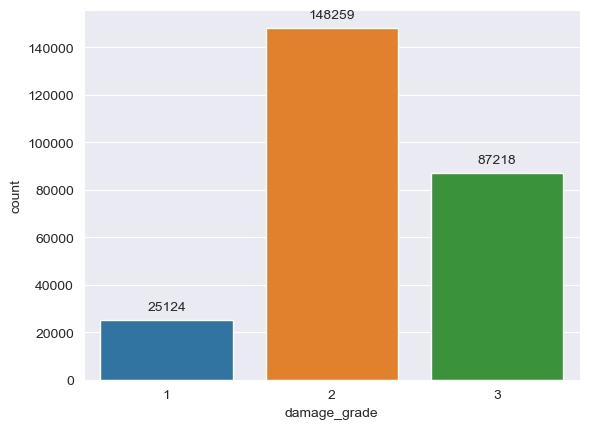

In [22]:
# countplot
ax = sns.countplot(x='damage_grade', data=df)

# annotate each bar with the count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

### 4.1 Distribution of `continous features`

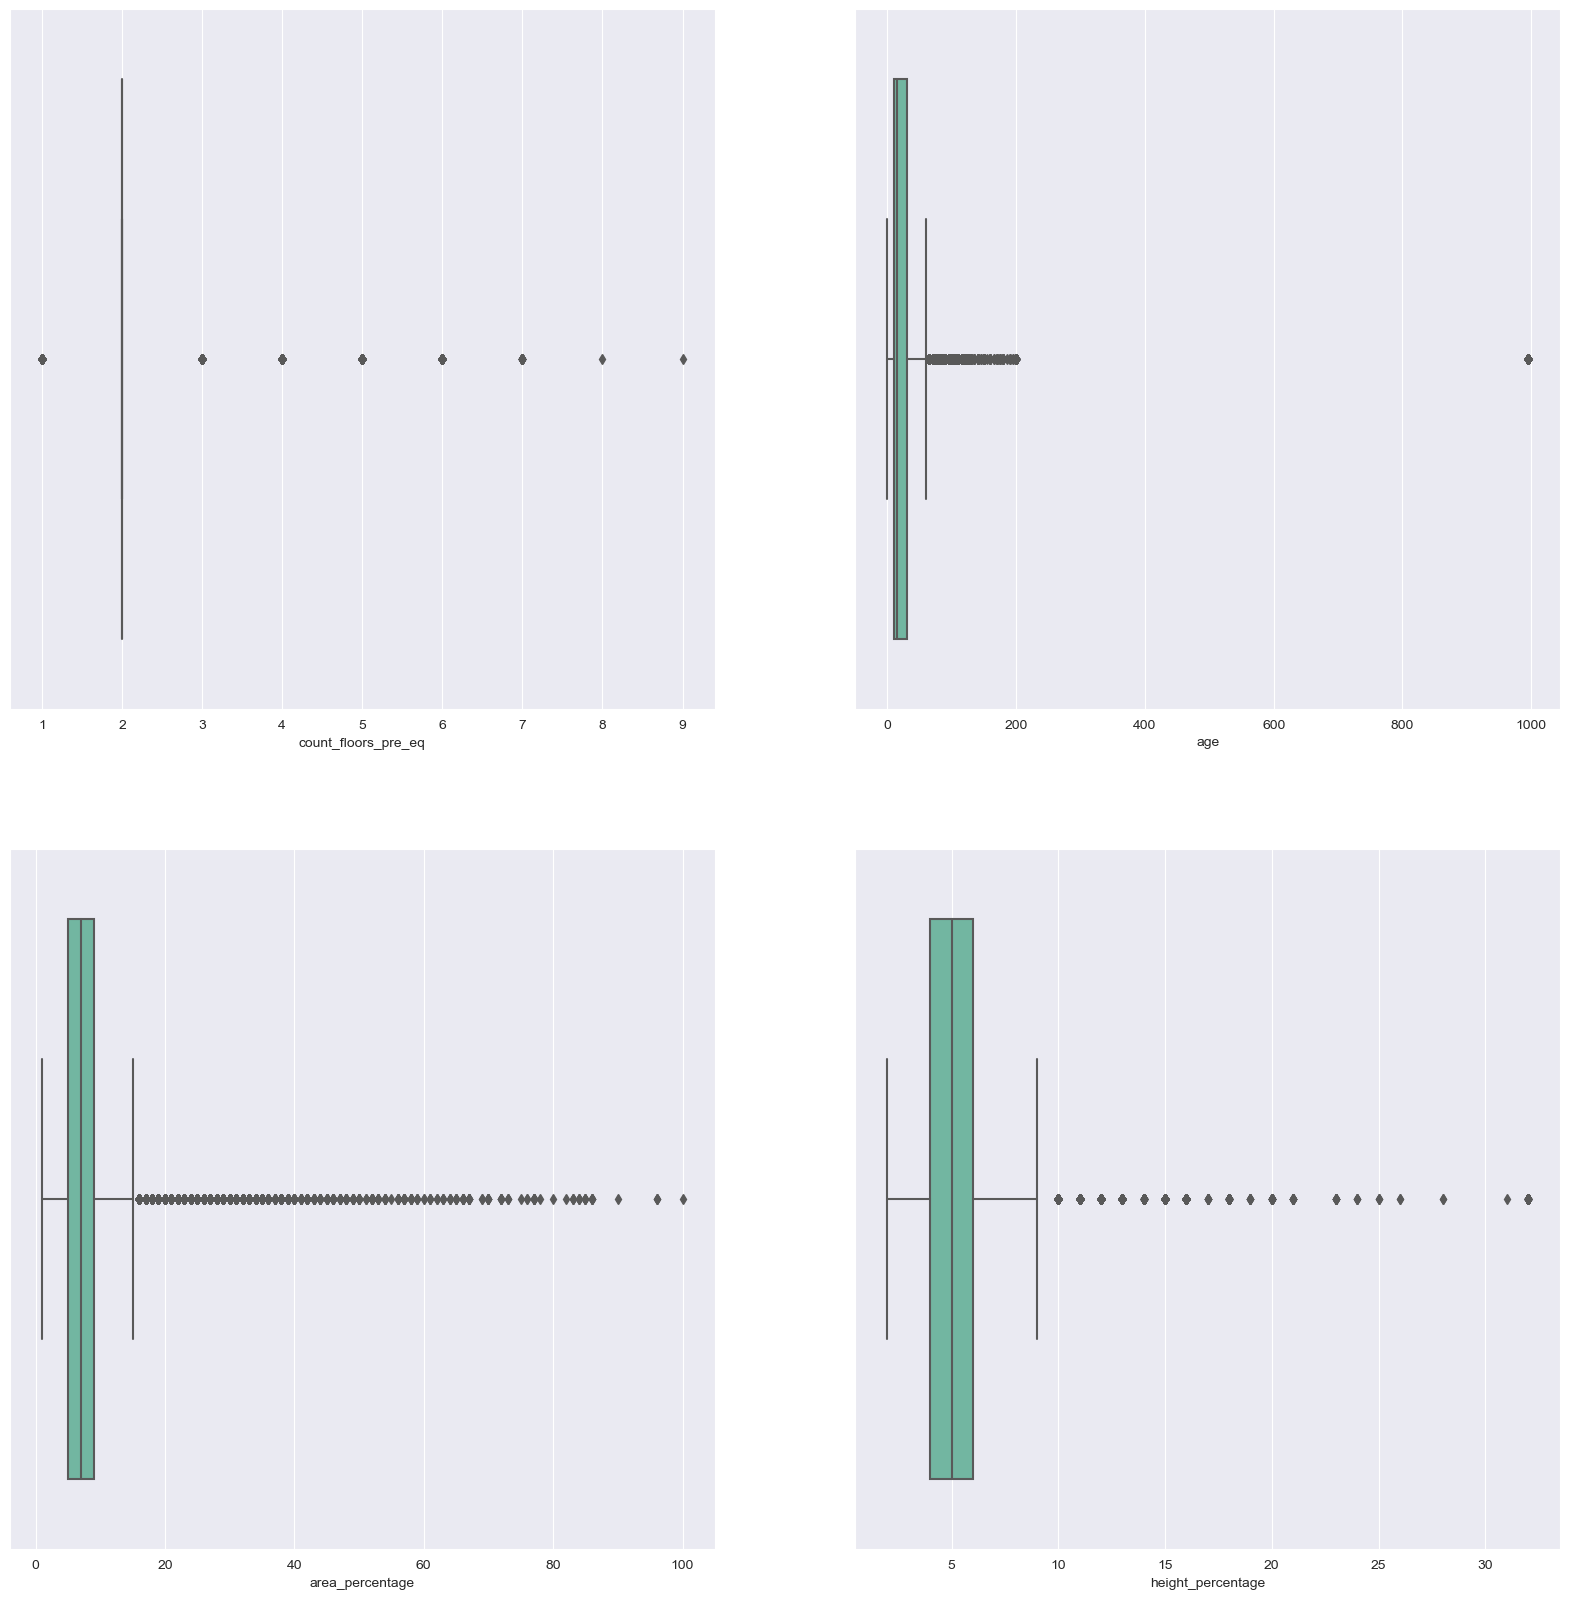

In [23]:
def plot_boxplot(columns):
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    for ax, col in zip(axes.flatten(), columns):
        sns.boxplot(df[col], ax=ax, palette='Set2')
        ax.set_xlabel(col)
    plt.show()

plot_boxplot(continuous_features)

Here we, can see some outliers in our features that needs to be handled

### 4.1 Distribution of `binary features`

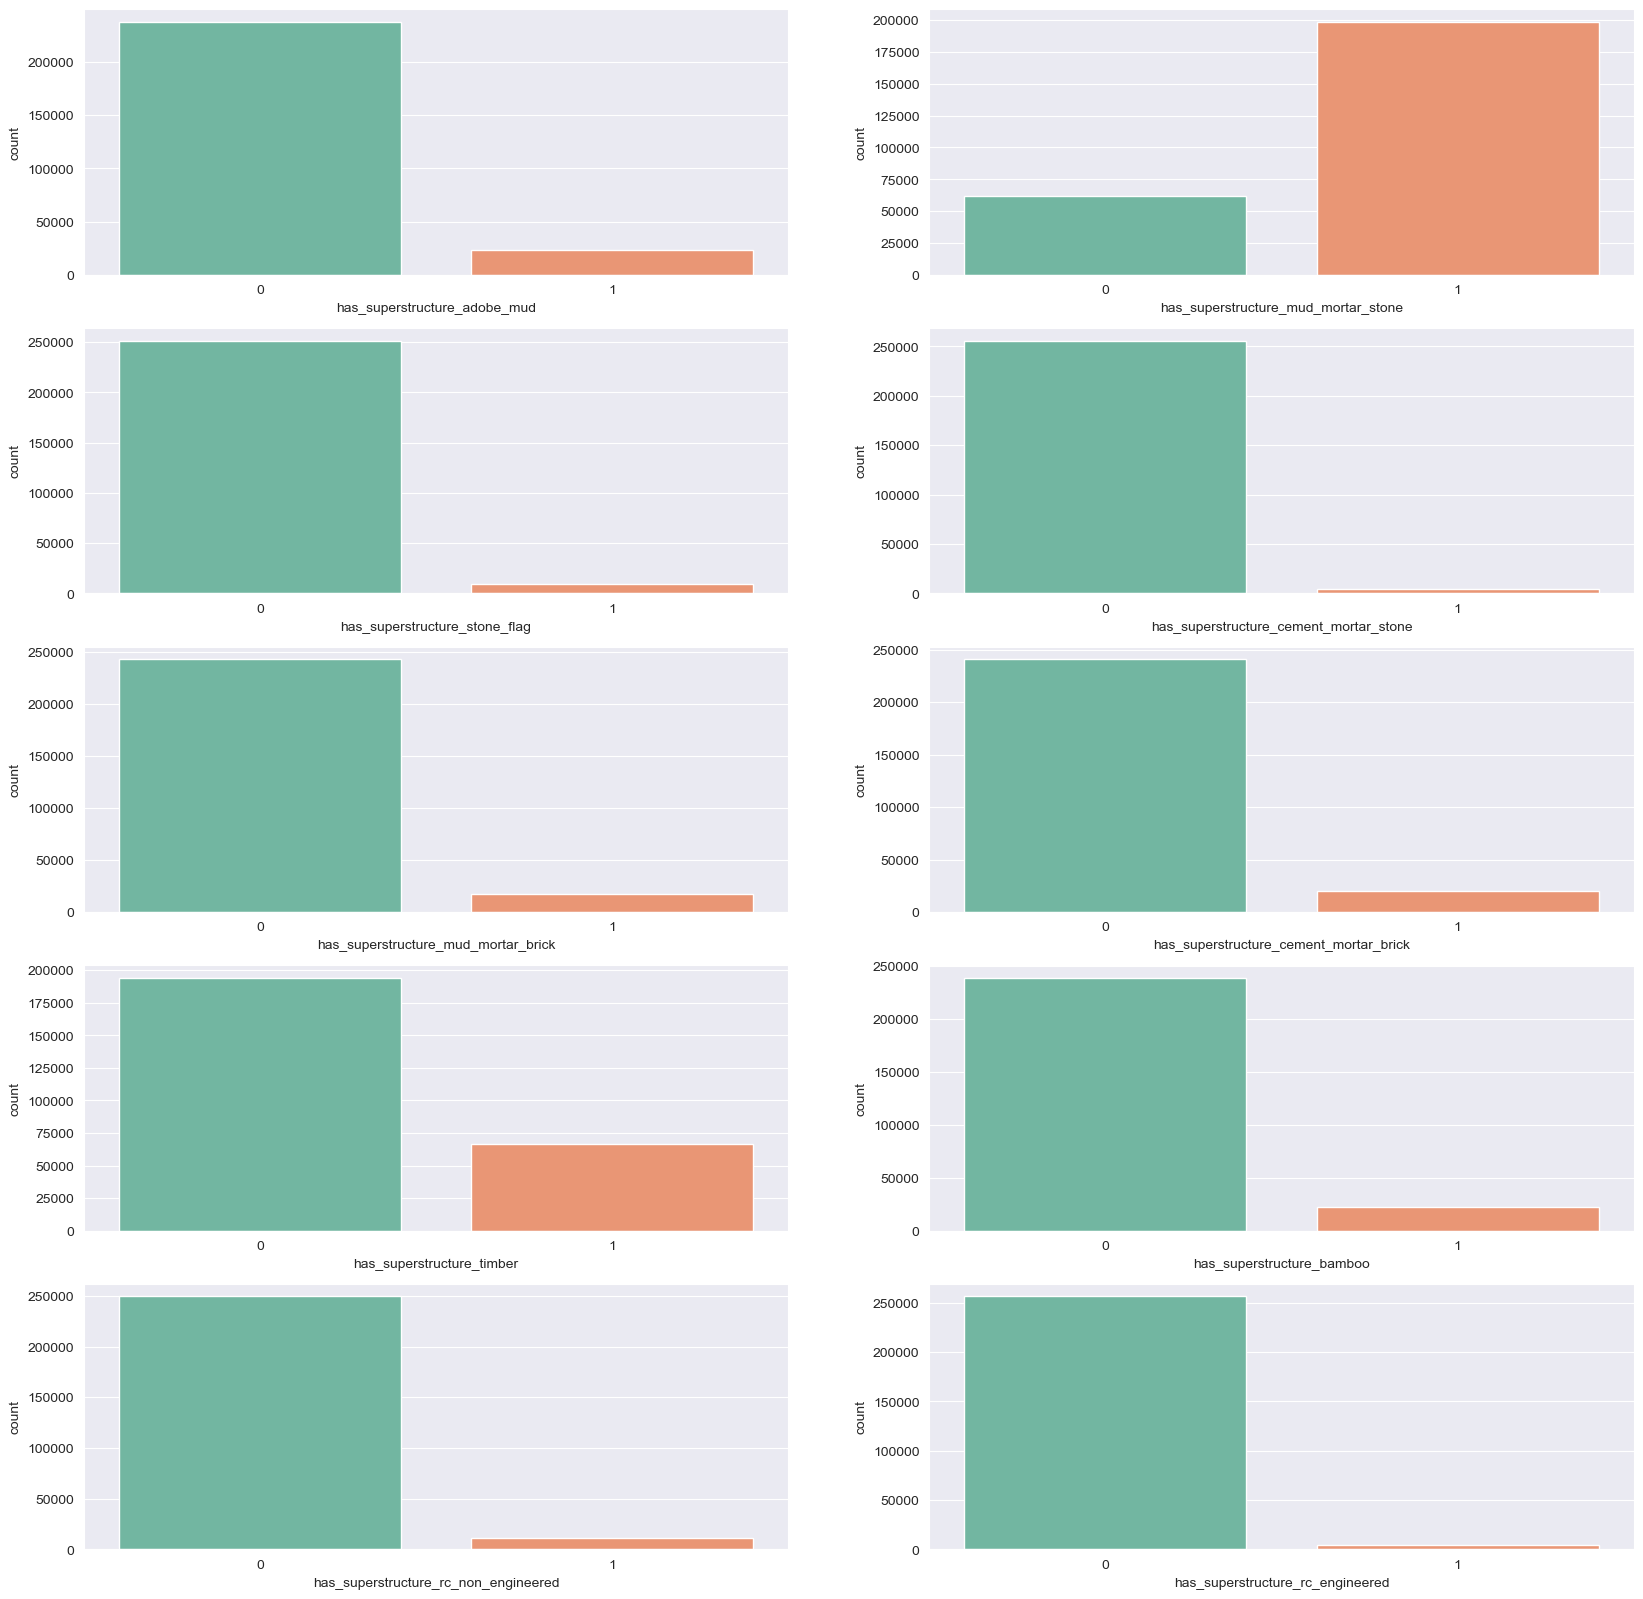

In [24]:
def plot_proportion(columns):
    fig, axes = plt.subplots(5, 2, figsize=(20, 20))
    for ax, col in zip(axes.flatten(), columns):
        sns.countplot(df[col], ax=ax, palette='Set2')
        ax.set_xlabel(col)
    plt.show()

plot_proportion(binary_features)

### 4.2 BIVARIATE ANALYSIS

#### Does `height_percentage` have any affect on `damage_grade`?

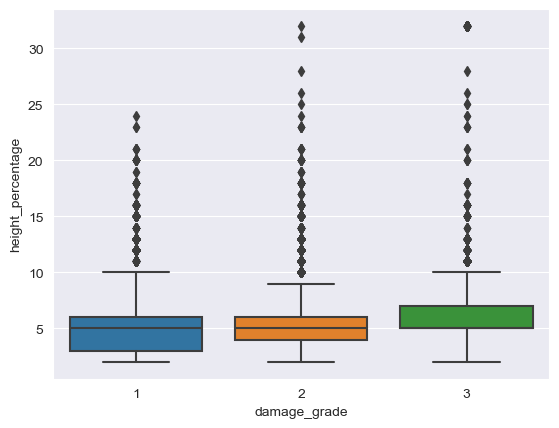

In [25]:
sns.boxplot(y='height_percentage', x='damage_grade', data=df);

## 5. Pre-Processing

### Convert categorical data to numerical data

In [27]:
X = df.copy()
# drop building_id and dependent variable damage_grade
X = X.drop(["damage_grade", "has_secondary_use"], axis=1)

# dependent variable
y = df["damage_grade"]

# categorical variables
label_encoding_columns = ['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type', 
                          'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

# label encoding categorical columns in train dataset 
X[label_encoding_columns] = X[label_encoding_columns].apply(lambda x: x.astype('category').cat.codes)


(260601,)